# Project : Cluster DBSCAN

## Introduction

This is a suplemental part of the project. The idea is to implement dbscan clustering for the iris data set.

*Github - copilot*

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions. It is particularly well-suited for datasets with clusters of varying shapes and sizes.

In this exercise , we will follow the sample in the scikit-learn website. The goal is to implement the DBSCAN clustering algorithm on the iris dataset and to understand how it works.

*I used this using fortran and NAG library for 2nd year applied mathematics project under DR Block , a cosmologist at WITS university.*

## References

[scikit learn plot_dbscan example](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
https://www.linkedin.com/advice/1/)
[linkin dbscan bes practices and pitfalls] what-best-practices-common-pitfalls-using-dbscan#:~:text=Therefore%2C%20you%20should%20always%20scale,standard%20deviation%20for%20each%20feature.

[linkin dbscan best practices and pitfalls] https://www.linkedin.com/advice/1/what-best-practices-common-pitfalls-using-dbscan#:~:text=Therefore%2C%20you%20should%20always%20scale,standard%20deviation%20for%20each%20feature.

[datacamp dbscan clustering](https://www.datacamp.com/tutorial/dbscan-clustering-algorithm


Import the necessary libraries to support project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



Import Analysis project

In [2]:
import analysis as an

Load the iris dataset

In [3]:
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")


Data loaded successfully


Import the kmeans module from sklearn

In [4]:
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Plot a scatter plot of the data  

To visualise the features , see if we can see obvious clustering

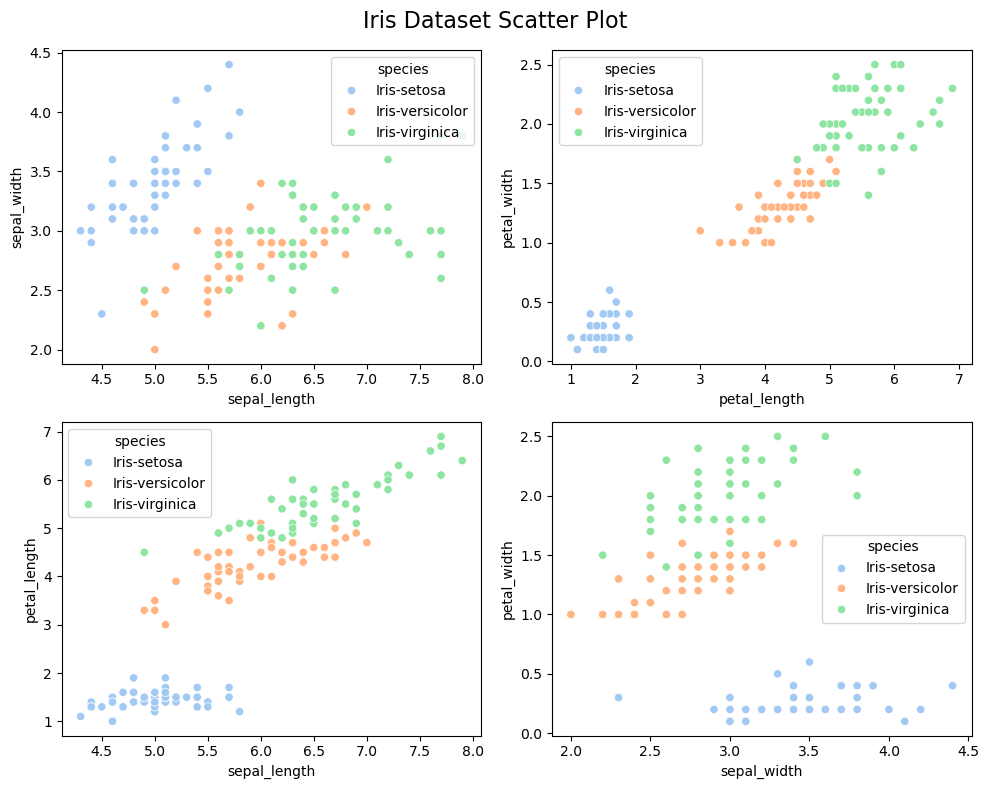

0

In [5]:
an.generate_scatter_plot(an.config, to_console=True)

Do a box Plot of the data

Again to see if we can see obvious clustering . The box plot will show if the data is distributes compactly and if there are any outliers and the potential impact on the clustering

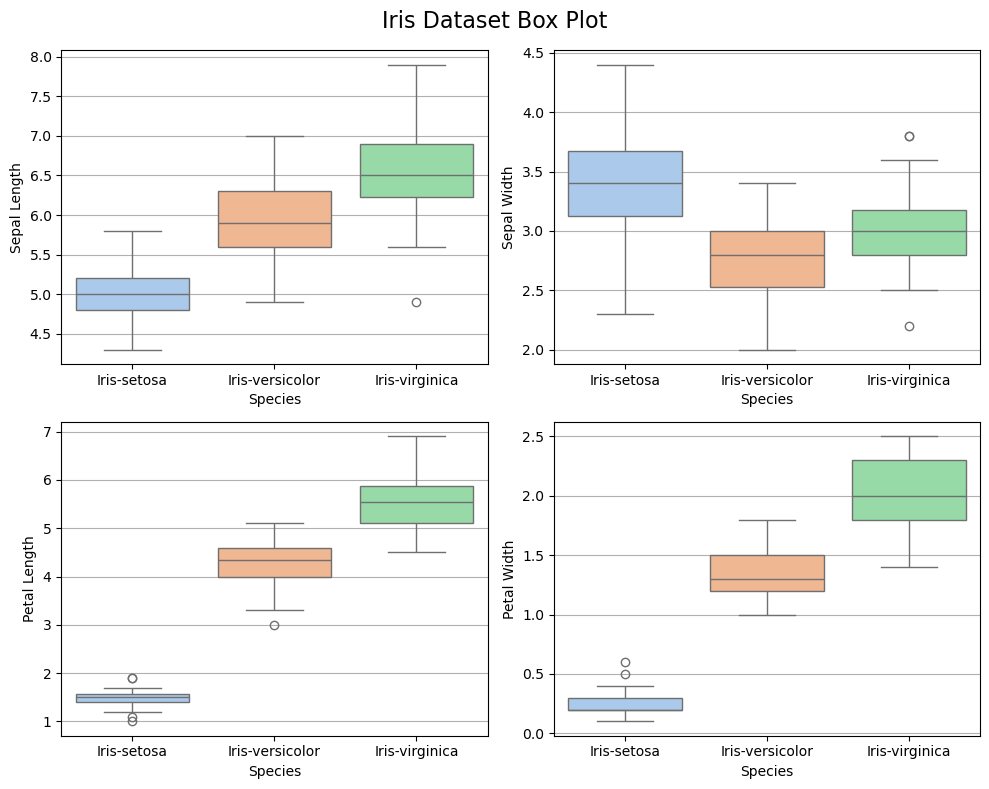

0

In [6]:
an.generate_box_plot(an.config, to_console=True)

Standardize the data for kmeans

That means all features are the same scale. This prevents bias towards features with larger scales.

Bring down to the standard scale ( mean = 0, std = 1)

In [7]:
# Standard 
scaler = StandardScaler()
# Standardize the data
# Fit the StandardScaler to the data only  interested in the features
X = df_iris.iloc[:, :-1].values
# Fit the scaler to the data - this computes the mean and std to be used for later scaling
# in a nutshell - "train" the scaler on the data
scaler.fit(X)
# apply the "fit" training metadata to the data to transform it to a standard scale
X_scaled = scaler.transform(X)


Do a scatter plot and box plot of the scaled data

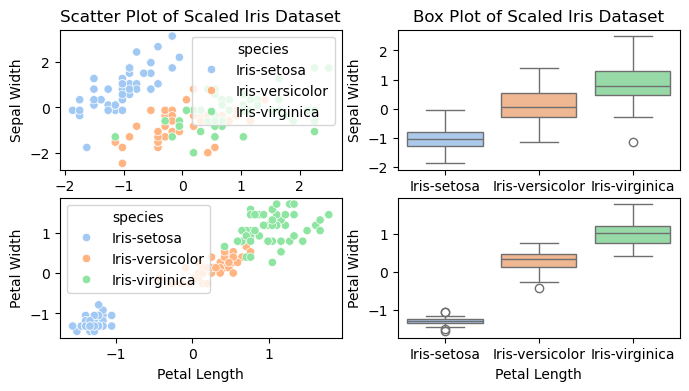

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(8, 4))
# scatter plot of the scaled data
ax[0,0].set_title("Scatter Plot of Scaled Iris Dataset")
ax[0,0].set_xlabel("Sepal Length")
ax[0,0].set_ylabel("Sepal Width")
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_iris["species"], ax=ax[0,0])
ax[1,0].set_xlabel("Petal Length")
ax[1,0].set_ylabel("Petal Width")
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=df_iris["species"], ax=ax[1,0])


ax[0,1].set_title("Box Plot of Scaled Iris Dataset")
ax[0,1].set_xlabel("Sepal Length")
ax[0,1].set_ylabel("Sepal Width")
sns.boxplot(x="species", y=X_scaled[:, 0], data=df_iris,hue='species', ax=ax[0,1])
ax[1,1].set_xlabel("Petal Length")
ax[1,1].set_ylabel("Petal Width")
sns.boxplot(x="species", y=X_scaled[:, 2], data=df_iris,hue='species', ax=ax[1,1])
plt.show()



Now apply RPA to reduce the data to 2D

In [9]:
RPA = PCA(n_components=2)
X_rpa = RPA.fit_transform(X_scaled)
print(f"Explained Variance Ratio: {RPA.explained_variance_ratio_}")
df_rpa = pd.DataFrame(data=X_rpa, columns=["PC1", "PC2"])
# Add the species column to the dataframe
# the order is preserved so we can just add the species column
df_rpa["species"] = df_iris["species"]


Explained Variance Ratio: [0.72770452 0.23030523]


Plot the data in 2D   

A scatter and box plot of the data in 2D. This will show if the data is now more compact and if there are any outliers and the potential impact on the clustering

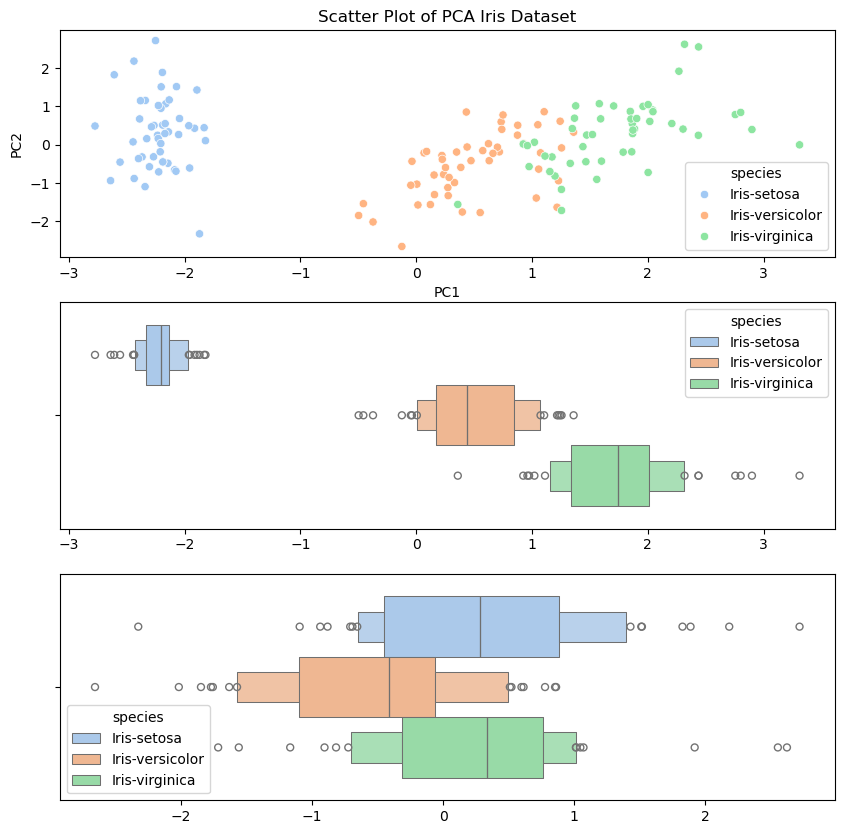

In [10]:
fig, ax = plt.subplots(3, figsize=(10, 10))
ax[0].set_title("Scatter Plot of PCA Iris Dataset")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_iris["species"], ax=ax[0])
sns.boxenplot(x=X_rpa[:, 0], hue=df_iris["species"], ax=ax[1])
sns.boxenplot(x=X_rpa[:, 1], hue=df_iris["species"], ax=ax[2])
plt.show()

**Silhouette plot**

The pitfall documentation recommends to do a "siloette" plot to see if the data is compact and if there are any outliers and the potential impact on the clustering

In this step we will try and run a siloette plot to see what it does , this is a learning exercise to see if the data is compact and if there are any outliers and the potential impact on the clustering

We will use github copilot to help us with the code

**What is a silhouette score?**
A silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score close to 1 indicates that the object is well clustered, a score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters, and a score close to -1 indicates that the object might have been assigned to the wrong cluster.

Google promot - https://www.google.com/search?q=how+to+plot+a+silhouette+graph&rlz=1C1GCEA_enUS1107US1107&oq=how+to+plot+a+silloutte&gs_lcrp=EgZjaHJvbWUqCQgBECEYChigATIGCAAQRRg5MgkIARAhGAoYoAEyBggCECEYFTIHCAMQIRifBTIHCAQQIRifBTIHCAUQIRifBTIHCAYQIRifBTIHCAcQIRifBTIHCAgQIRifBTIHCAkQIRifBdIBCDgxMDNqMGo0qAIAsAIB&sourceid=chrome&ie=UTF-8


https://www.youtube.com/watch?v=_j37uExzbXk&t=58s


Silhouette Score: 0.40
           species  Silhouette Coefficient
0      Iris-setosa                0.642180
1  Iris-versicolor                0.307462
2   Iris-virginica                0.251181


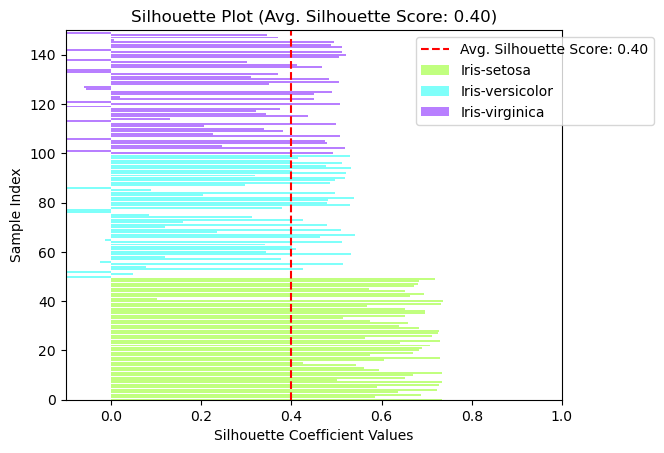

In [11]:
# Sample code from google prompt for silhouette score
# apply a sillouette score to the PCA data
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# do silhouette score on the PCA data
silhouette = silhouette_score(X_rpa, df_iris["species"])
print(f"Silhouette Score: {silhouette:.2f}")

# Assuming you have your clustered data in 'X' and cluster labels in 'labels'
 # Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X_rpa, df_iris["species"])
silhouette_vals_array = silhouette_vals.reshape(-1, 1)
# Create a DataFrame for the silhouette values
df_silhouette = pd.DataFrame(data=silhouette_vals_array, columns=["Silhouette Coefficient"])
# add the species column to the dataframe
df_silhouette["species"] = df_iris["species"]
# do a groupby on the species column to get the average silhouette score for each species
df_silhouette_grouped = df_silhouette.groupby("species").mean().reset_index()
print(df_silhouette_grouped)

# Calculate the average silhouette score for the clustering
avg_silhouette_score = silhouette_score(X_rpa, df_iris["species"])

# Plot the silhouette plot
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_rpa)])
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Sample Index")
ax.set_title(f"Silhouette Plot (Avg. Silhouette Score: {avg_silhouette_score:.2f})")


# Plot the silhouette values
# plot each sample with a different color based on its cluster label
colors = sns.color_palette("hsv", len(np.unique(df_iris["species"])))
for i, label in enumerate(np.unique(df_iris["species"])):
    ax.barh(np.where(df_iris["species"] == label)[0], silhouette_vals[df_iris["species"] == label], color=colors[i], alpha=0.5, label=label)


# Add a horizontal line for the average silhouette score
ax.axvline(avg_silhouette_score, color='red', linestyle='--', label=f"Avg. Silhouette Score: {avg_silhouette_score:.2f}")
# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Determine how the clusters identified the species based on the species name

**DBSCAN Parameters**

DBSCAN needs two parameters:

- epsilon (eps): max distance between two points to be considered neighbors.
- min_samples: MinPts in a neighborhood to be considered a core point ( mini cluster).


*Calculate the epsilon parameter*

The recommended method is to use a k-distance graph , and then elbow method to find the most applicable epsilon.

The elbow is determined visually be finding the distance to the nearest neighbor and then plotting and looking for the inflexion point ( bendy bit).  

Note: I think there is a method to work out the inflexion point using a numerical method. I will look into this later.


- [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) - to find the nearest neighbors of each point in the dataset.
- [Medium dbscan paramter estimation])(https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd)] - step by step guide to find the best parameters for DBSCAN.

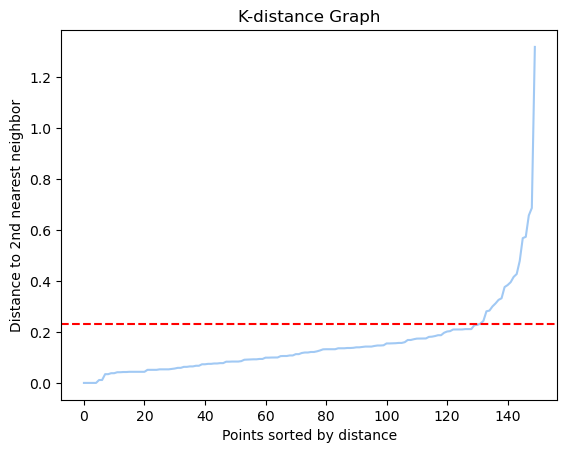

(-3.0, 3.0)

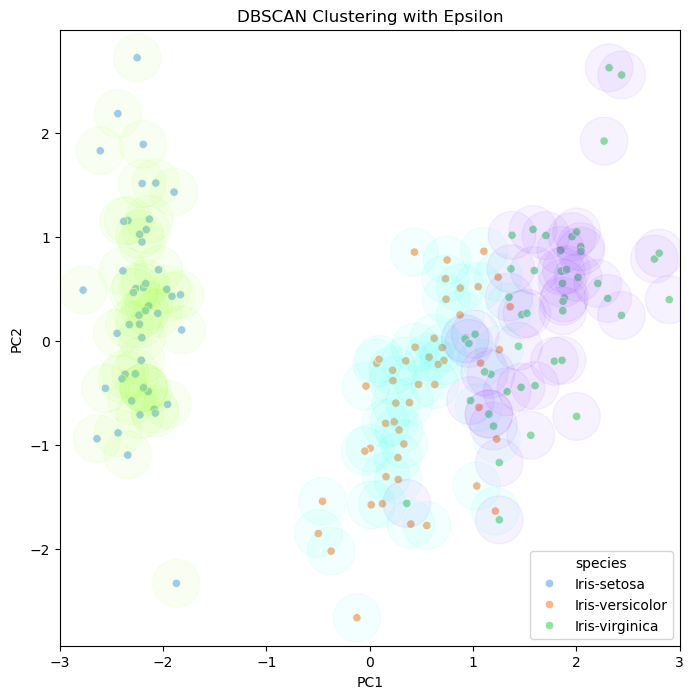

In [12]:
from sklearn.neighbors import NearestNeighbors

# nearset neighbors using PCA data
# using the PCA data to find the nearest neighbors
# n_neighbors = 2 - the nearest neighbor is the point itself, so we want the 2nd nearest neighbor
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X_rpa)

distances, indices = nbrs.kneighbors(X_rpa)

# this returns a array number of rows in X_rpa and the columns of distances 
# 0th is the distance to self, 1st is the distance to the nearest neighbor
distances = distances[:,1]
# sort the distances from nearest to futherst
# originally was sorted all , more efficient to sort the 2nd nearest neighbor only
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 2nd nearest neighbor")
# now draw a horizontal line at the epsilon value
# epsilon is the distance at which we want to cluster the points
eps = 0.23
plt.axhline(y=eps, color='r', linestyle='--')

plt.show()

# use github copilot to help me work out how to do this
# using seabourn to plot scatter plot with the epsilon value being diameter of the circle
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title("DBSCAN Clustering with Epsilon")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
# plot the points with a circle of radius eps around them
sns.scatterplot(x=X_rpa[:, 0], y=X_rpa[:, 1], hue=df_iris["species"], ax=ax)
# plot the points with a circle of radius eps around them
# get the hue values for the points
hue_values = df_iris["species"].values
# mqp the hue values to the colors used in the scatter plot
colors = sns.color_palette("hsv", len(np.unique(hue_values)))
for i in range(len(X_rpa)):
    # draw a circle around the point with radius eps
    # print color for the point
    color = colors[np.where(np.unique(hue_values) == hue_values[i])[0][0]]
    circle = plt.Circle((X_rpa[i, 0], X_rpa[i, 1]), eps, color=color, alpha=0.05)
    ax.add_artist(circle)
plt.xlim(-3, 3)

*Add knee method later*

*Calculate the MinPts parameter*

The run of thumb for minPts is 2 * dimensions of the data + 1. In this case $2 * 2 + 1 = 5.$

- [Wikipedia minPts](https://en.wikipedia.org/wiki/DBSCAN#:~:text=DBSCAN%20requires%20two%20parameters%3A%20%CE%B5,points%2C%20a%20cluster%20is%20started.) 

Now calulate the DBSCAN clustering using the parameters above
- [Scikit learn DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) - to perform the clustering.

In [13]:
# DBSCAN clustering
# eps = 0.25, min_samples = 5

from sklearn import metrics

dbscan = DBSCAN(eps=eps, min_samples=5).fit(X_rpa)
# get the labels for the clusters
clusters = dbscan.fit_predict(X_rpa)

<Axes: title={'center': 'DBSCAN Clustering'}, xlabel='PC1', ylabel='PC2'>

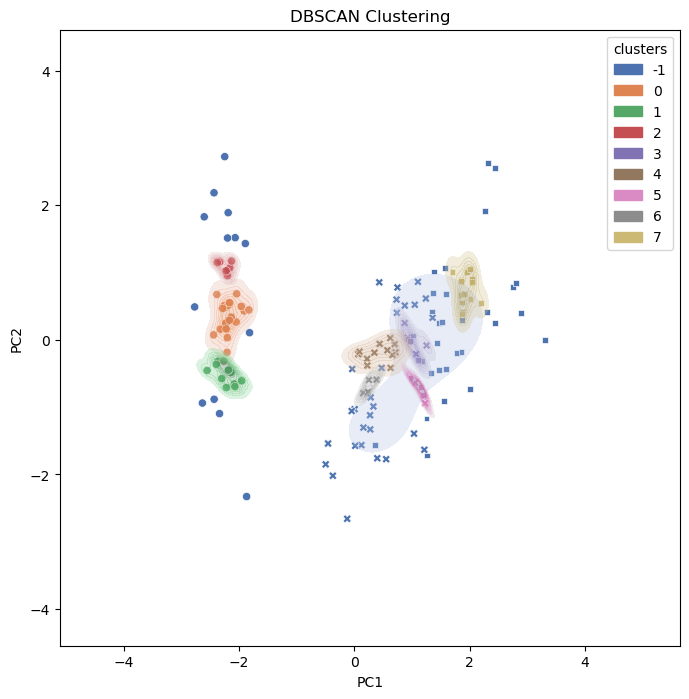

In [14]:
# using seaborn to plot the clusters
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
# plot different markers based on species
# use the clusters as the hue values
# convert X_rpa to a dataframe
df_rpa = pd.DataFrame(data=X_rpa, columns=["PC1", "PC2"])
# add the clusters to the dataframe
df_rpa["clusters"] = clusters
# add the species to the dataframe
df_rpa["species"] = df_iris["species"]
sns.scatterplot(x='PC1', y='PC2', hue='clusters',ax=ax,style='species',data=df_rpa, palette="deep")
# draw kdensity contours for the clusters
sns.kdeplot(x='PC1', y='PC2', data=df_rpa, hue='clusters', ax=ax, palette="deep", fill=True, alpha=0.3)


